# How to find whether Logistic Regression to be applied?
1. Is the dataset supervised? (having output column?)

2. Is the input data numeric?

3. Is the input data linear?

4. Is the output column categorical?

5. Is the output column probabilistic?

yes!!! You may use Logistic Regression

# is  dataset linear?
1. Use correlation
2. Plot scatter chart
3. may use pair plots

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv(r"/content/weather.csv")
print(df.shape)
print(df.info())


(8, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   weather  8 non-null      object
 1   day      8 non-null      object
 2   target   8 non-null      object
dtypes: object(3)
memory usage: 320.0+ bytes
None


In [ ]:
df.head(20)

,weather,day,target
0,sunny,mon,yes
1,sunny,mon,yes
2,cloudy,tue,yes
3,chill,wed,no
4,chill,tue,no
5,cloudy,thur,no
6,sunny,fri,yes
7,chill,thur,no


In [ ]:
df.replace({"target":{'yes':1,'no':0},"weather":{'sunny':1,'cloudy':2,'chill':3},"day":{'mon':1,'tue':2,'wed':3,'thur':3,'fri':4}},inplace=True)

In [ ]:
print(df[df['target']==1].count())

weather    4
day        4
target     4
dtype: int64


In [ ]:
print(df[df['target']==0].count())

weather    4
day        4
target     4
dtype: int64


# Draw Scatter Plot

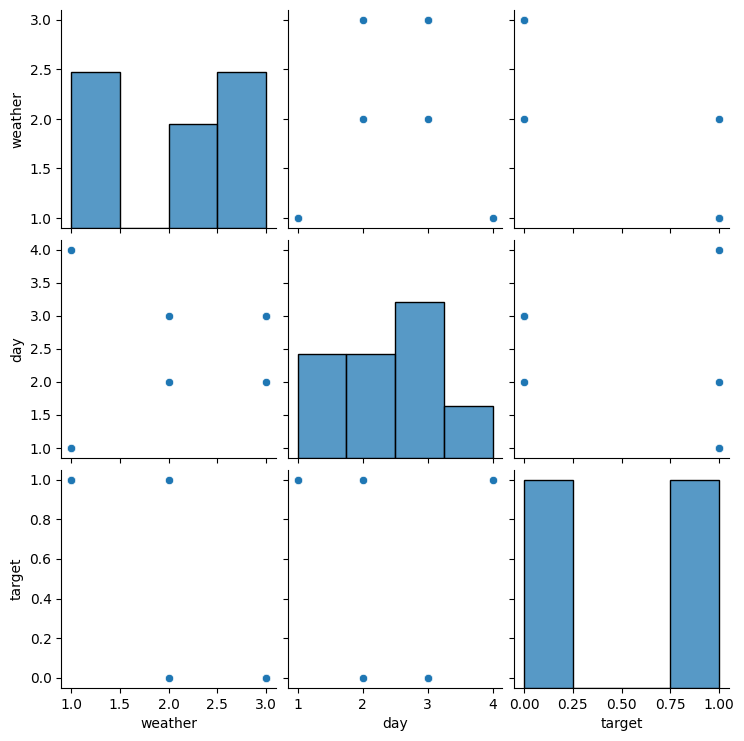

In [ ]:
sb.pairplot(df)



          weather       day    target
weather  1.000000  0.290957 -0.866025
day      0.290957  1.000000 -0.377964
target  -0.866025 -0.377964  1.000000


<Axes: >

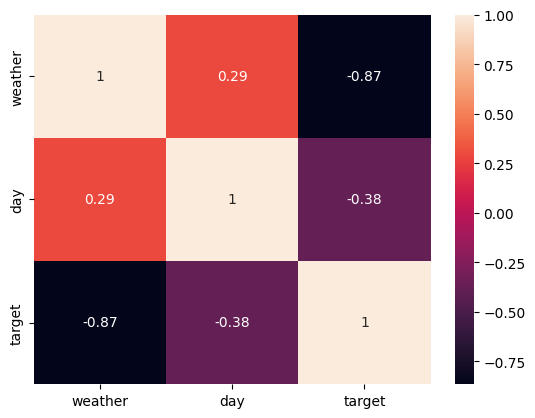

In [ ]:
df1=df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [ ]:
df.drop(columns=['User ID'],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.isnull().sum()


weather    0
day        0
target     0
dtype: int64

In [ ]:
df.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

# Input and Output Splitting

In [ ]:
from sklearn import linear_model
regress=linear_model.LogisticRegression()
df2=df.values
#print(df2)
train_x=(df2[:,0:6])
train_y=(df2[:,2])
print(train_x.shape)
print(train_y.shape)

(8, 3)
(8,)


# MinMax Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
train_x=ms.fit_transform(train_x)
print(train_x)



[[0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.5        0.33333333 1.        ]
 [1.         0.66666667 0.        ]
 [1.         0.33333333 0.        ]
 [0.5        0.66666667 0.        ]
 [0.         1.         1.        ]
 [1.         0.66666667 0.        ]]


# Regression Line Fitting

In [ ]:
regress.fit(train_x,train_y)
#The coefficents y=m0x0+m1x1+...+m11x11+c
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)

Coefficients: [[-0.80367875 -0.2570984   1.15356395]]
Intercept: [-0.05561321]


In [ ]:
#Example for 1D array: Taken from Kaggle
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
training_data_X    = np.array([ [1.2, 6.7, 2.7],  [2.3, 4.6, 2.2],  [0.3, 3.9, 0.8],  [2.1, 1.3, 4.3]  ])
training_scores_Y  = np.array( [1.4, 9.2, 2.5, 2.2] )
prediction_data_test  = np.array([ [1.5, 3.4, 2.2],  [7.6, 7.2, 0.2] ])
#clf = LogisticRegression()
#clf.fit(training_data_X, training_scores_Y)
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(training_scores_Y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(training_scores_Y))
print(utils.multiclass.type_of_target(training_scores_Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))
clf = LogisticRegression()
clf.fit(training_data_X, training_scores_encoded)
print("LogisticRegression")
print(clf.predict(prediction_data_test))

[0 3 2 1]
continuous
multiclass
multiclass
LogisticRegression
[3 3]


# Prediction

In [ ]:
y_predicted=regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv(r"F:\Logistic_Result.csv")

1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0


# Plotting

In [ ]:
plt.scatter(df['Age'],df['EstimatedSalary'],color='red',label='Actual')
plt.scatter(df['Pred'],df['EstimatedSalary'],color='blue',label='Predicted')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


KeyError: ignored

# Metrics

In [ ]:
from sklearn import metrics
print('Accuracy ', metrics.accuracy_score(train_y,y_predicted))
print('Confusion Matrix \n ', metrics.confusion_matrix(train_y,y_predicted))


Accuracy  1.0
Confusion Matrix 
  [[4 0]
 [0 4]]


Text(0.5, 1.0, 'Accuracy Score:1.0')

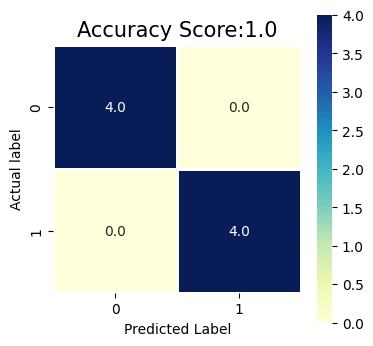

In [ ]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted),annot=True,fmt=".1f",linewidths=.90,square=True,cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')
all_sample_title='Accuracy Score:{0}'.format(metrics.accuracy_score(train_y,y_predicted))
plt.title(all_sample_title,size=15)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       143

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

